In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix



In [14]:
data=pd.read_csv("spam.csv", encoding="latin-1")

In [16]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [18]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [19]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data['v1']=data['v1'].map({'ham':0, 'spam':1})

In [21]:
data.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X=data['v2']
y=data['v1']

In [25]:
X.shape

(5572,)

In [26]:
y.shape

(5572,)

In [27]:
data.isnull().sum()

v1    0
v2    0
dtype: int64

In [28]:
cv=CountVectorizer()

In [29]:
X=cv.fit_transform(X)

In [30]:
x_train, x_test,y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)
x_train.shape

(4457, 8672)

In [31]:
x_test.shape

(1115, 8672)

In [32]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [33]:
model.score(x_test, y_test)

0.97847533632287

In [34]:
import pickle

In [35]:
pickle.dump(model, open("spam.pkl","wb"))

In [36]:
pickle.dump(cv, open("vectorizer.pkl","wb"))

In [37]:
clf=pickle.load( open("spam.pkl","rb"))

In [38]:
clf

MultinomialNB()

In [39]:
msg="Hello There"
data = [msg]
vect = cv.transform(data).toarray()
result = model.predict(vect)
print(result)


[0]


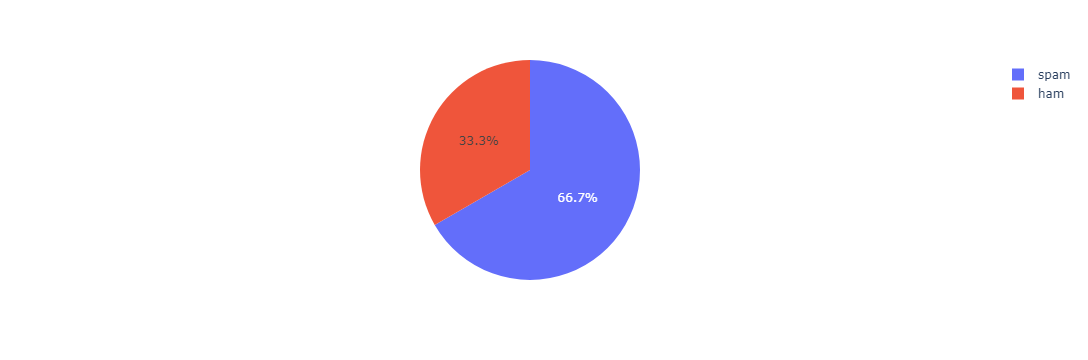

In [59]:
# Now you can access the 'Category' column
plot_spam_ratio = df['Category'].value_counts().rename_axis('values').to_frame('counts').reset_index()

# Now you can plot the pie chart
import plotly.express as px
px.pie(plot_spam_ratio, values='counts', names='values')

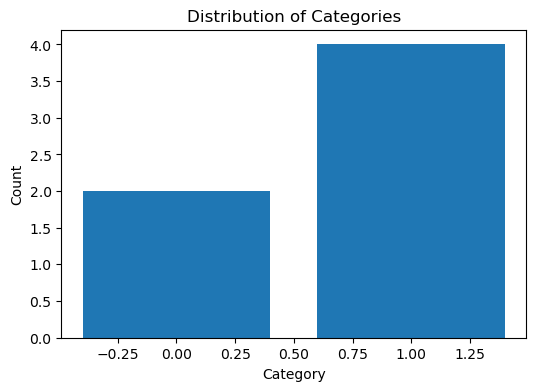

In [75]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Category', ylabel='count'>

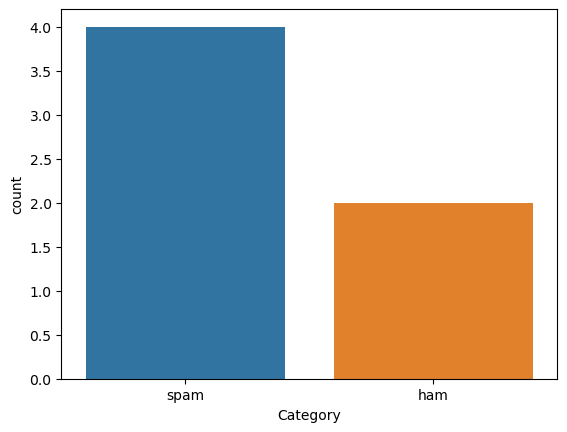

In [83]:
sns.countplot(x = "Category", data = data)

In [102]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

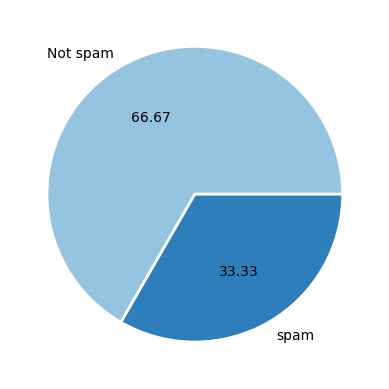

In [103]:
import matplotlib.pyplot as plt
colors = plt.get_cmap('Blues')(np.linspace(0.4, 0.7, 2))
plt.pie(data['Category'].value_counts(),labels=['Not spam','spam'],autopct='%0.2f', colors=colors, 
       wedgeprops={"linewidth": 2, "edgecolor": "white"})
plt.show()